In [1]:
from vnpy.app.spread_trading.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_arbitrage_strategy import (
    BmArbitrageStrategy
)

from vnpy.app.spread_trading.strategies.basic_spread_strategy import (
    BasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_spread_strategy import (
    BmBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.spread_statistical_arbitrage_strategy import (
    SpreadStatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_multi_basic_spread_strategy import (
    BmMultiBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_date_spread_strategy import (
    BmBasicDateSpreadStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime


In [2]:
spread = SpreadData(
    name="BM",
    legs=[LegData("BMCURRENT.BITMEX"), LegData("BMFORWARD.BITMEX")],
    price_multipliers={"BMCURRENT.BITMEX": -1, "BMFORWARD.BITMEX": 1},
    trading_multipliers={"BMCURRENT.BITMEX": -1, "BMFORWARD.BITMEX": 1},
    active_symbol="BMFORWARD.BITMEX",
#     inverse_contracts={"BMFORWARD.BITMEX": False, "BMCURRENT.BITMEX": False}, # 正向
    inverse_contracts={"BMFORWARD.BITMEX": True, "BMCURRENT.BITMEX": True},  #反向
    min_volume=1
)

In [3]:
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2019,9, 14),
    end=datetime(2019, 12, 26),
    rate=0.00075,
    slippage=0.001,
    size=1,
    pricetick=0.2,
#     capital=1_000_000,
    capital = 100
    
)
# engine.add_strategy(StatisticalArbitrageStrategy, {})
# engine.add_strategy(SpreadStatisticalArbitrageStrategy, {}) #添加boll 差价 判读开仓

# engine.add_strategy(BmArbitrageStrategy, {})
# engine.add_strategy(BasicSpreadStrategy , {})
# engine.add_strategy(BmBasicSpreadStrategy, {"short_price": 150, "cover_price" : 50}) # 只远期开空，近期开多 符合平仓条件后，平空 平多
# engine.add_strategy(BmMultiBasicSpreadStrategy, {}) # 主动腿多空循环开仓
engine.add_strategy(BmBasicDateSpreadStrategy, {"short_price": 150, "cover_price" : 50, "start_days" : 3, "end_days": 5, "max_pos" : 50})


2019-12-09 11:16:04.173505	开始加载历史数据
2019-12-09 11:16:26.624892	历史数据加载完成，数据量：107359
2019-12-09 11:16:26.783274	策略初始化完成
2019-12-09 11:16:26.783436	开始回放历史数据
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-11 00:18:00
 正常平仓时间 2019-11-11 00:18:00
 self.datetime 2019-11-21 23:04:00
 正常开仓时间 2019-11-21 23:04:00
2019-12-09 11:16:27.777091	历史数据回放结束
2019-12-09 11:16:27.777406	开始计算逐日盯市盈亏
2019-12-09 11:16:27.779863	逐日盯市盈亏计算完成
2019-12-09 11:16:27.780109	开始计算策略统计指标
2019-12-09 11:16:27.790132	------------------------------
2019-12-09 11:16:27.790164	首个交易日：	2019-09-24
2019-12-09 11:16:27.790181	最后交易日：	2019-11-27
2019-12-09 11:16:27.790195	总交易日：	65
2019-12-09 11:16:27.790208	盈利交易日：	4
2019-12-09 11:16:27.790221	亏损交易日：	7
2019-12-09 11:16:27.790237	起始资金：	100.00
2019-12-09 11:16:27.790383	结束资金：	5,692.62
2019-12-09 11:16:27.790404	总收益率：	5,592.62%
2019-12-09 11:16:27.790417	年化收益：	20,649.69%
2019-12-09 11:16:27.790429	最大回撤: 	-1,970.00
2019-12-09 11:16:27.790444	百分比最大回撤: -125.94%


/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:355: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)
/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:375: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


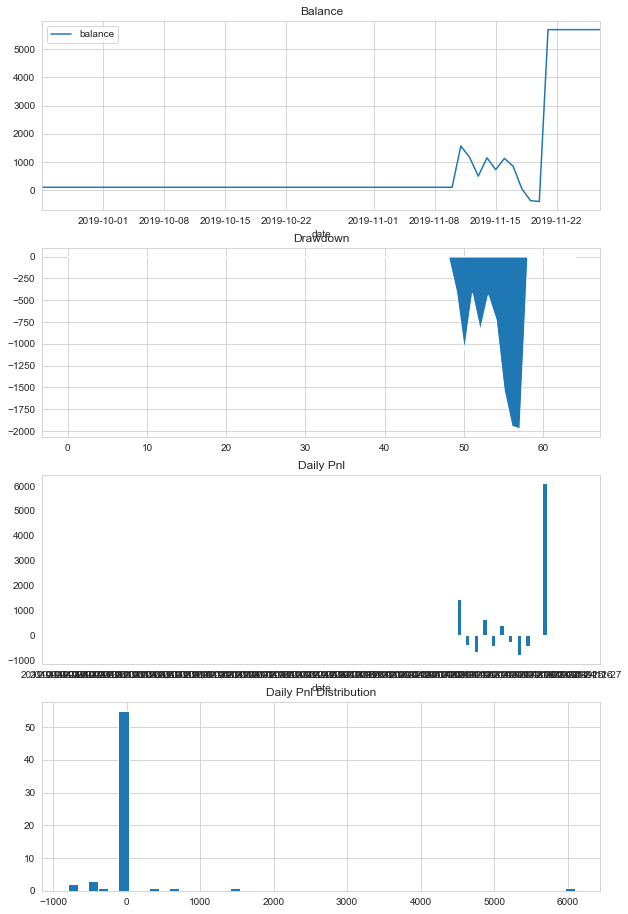

In [4]:
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [5]:
for trade in engine.trades.values():
    print(trade)

TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='2', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=153.0, volume=50, time='2019-11-11 00:18:00')
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='3', tradeid='2', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=41.0, volume=50, time='2019-11-21 23:04:00')


In [6]:
setting = OptimizationSetting()
print(setting.__dict__)
setting.set_target("total_return")
setting.add_parameter("cover_price", 0, 100, 10)
setting.add_parameter("short_price", 100, 300, 10)

# setting.add_parameter("atr_ma_length", 10, 30, 1)

# engine.run_ga_optimization(setting)
# engine.run_optimization(setting)

{'params': {}, 'target_name': ''}
